In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/covid_19_india.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

# vaccination drive

In [4]:
df_vaccine=pd.read_csv(r'/content/covid_vaccine_statewise (2).csv')

In [5]:
df_vaccine.head(144)

Updated On  State  ...  60+ years (Age)  Total Doses Administered
0    16/01/2021  India  ...              NaN                   48276.0
1    17/01/2021  India  ...              NaN                   58604.0
2    18/01/2021  India  ...              NaN                   99449.0
3    19/01/2021  India  ...              NaN                  195525.0
4    20/01/2021  India  ...              NaN                  251280.0
..          ...    ...  ...              ...                       ...
139  04/06/2021  India  ...       60810517.0               223642281.0
140  05/06/2021  India  ...       61200972.0               227162503.0
141  06/06/2021  India  ...       61331191.0               228624578.0
142  07/06/2021  India  ...       61699177.0               232063488.0
143  08/06/2021  India  ...              NaN                       NaN

[144 rows x 18 columns]

In [6]:
df_vaccine.columns

Index(['Updated On', 'State', 'Total Individuals Vaccinated',
       'Total Sessions Conducted', 'Total Sites ', 'First Dose Administered',
       'Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered',
       'Total Sputnik V Administered', 'AEFI', '18-45 years (Age)',
       '45-60 years (Age)', '60+ years (Age)', 'Total Doses Administered'],
      dtype='object')

In [7]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [8]:
configure_plotly_browser_state()
firstdose=df_vaccine["First Dose Administered"].iloc[142]
seconddose=df_vaccine["Second Dose Administered"].iloc[142]
px.pie(names=["First Dose","Second Dose"],values=[firstdose,seconddose],title="First VS Second Dose")

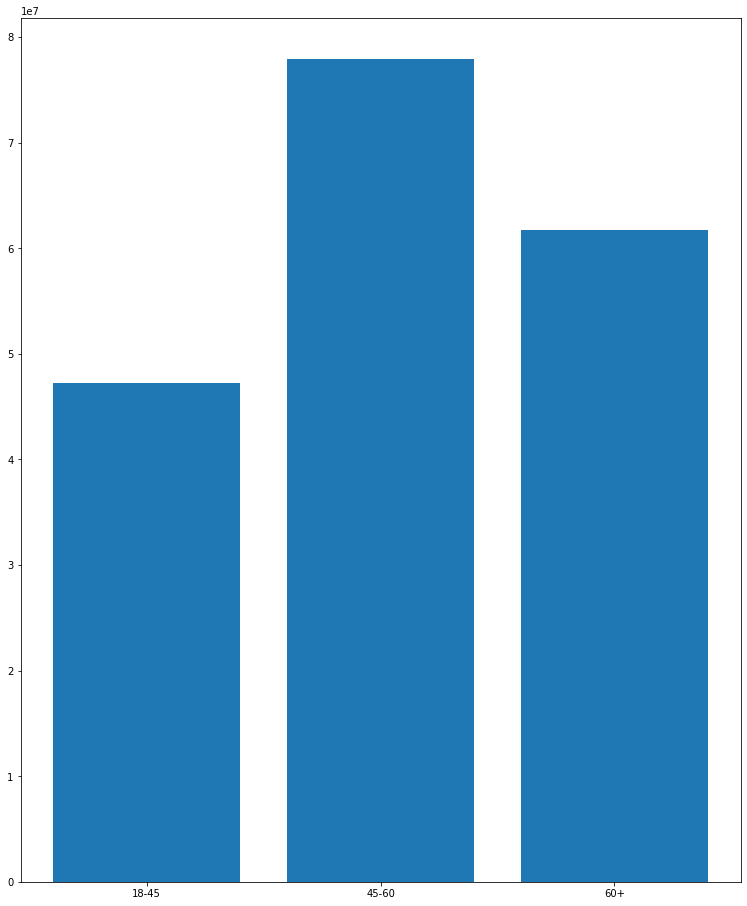

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
firstage=df_vaccine["18-45 years (Age)"].iloc[142]
secondage=df_vaccine["45-60 years (Age)"].iloc[142]
thirdage=df_vaccine["60+ years (Age)"].iloc[142]
ages=['18-45','45-60','60+']
vaccine=[firstage,secondage,thirdage]
ax.bar(ages,vaccine)
plt.show()

In [10]:
display(df_vaccine.iloc[142])

Updated On                              07/06/2021
State                                        India
Total Individuals Vaccinated           1.86934e+08
Total Sessions Conducted               1.26254e+07
Total Sites                                  45459
First Dose Administered                1.86934e+08
Second Dose Administered               4.51297e+07
Male(Individuals Vaccinated)           1.00656e+08
Female(Individuals Vaccinated)         8.62461e+07
Transgender(Individuals Vaccinated)          31271
Total Covaxin Administered             2.70311e+07
Total CoviShield Administered          2.05015e+08
Total Sputnik V Administered                 17800
AEFI                                         21820
18-45 years (Age)                      4.72337e+07
45-60 years (Age)                      7.79301e+07
60+ years (Age)                        6.16992e+07
Total Doses Administered               2.32063e+08
Name: 142, dtype: object

In [11]:
configure_plotly_browser_state()
firstagepi=df_vaccine["18-45 years (Age)"].iloc[142]
secondagepi=df_vaccine["45-60 years (Age)"].iloc[142]
thirdagepi=df_vaccine["60+ years (Age)"].iloc[142]
px.pie(names=["18-45","45-60","60+"],values=[firstagepi,secondagepi,thirdagepi],title="age wise distribution")

In [12]:
configure_plotly_browser_state()
df_vaccine.iplot(kind='bar',x='Updated On',y='18-45 years (Age)')

In [13]:
configure_plotly_browser_state()
df_vaccine.iplot(kind='bar',x='Updated On',y='45-60 years (Age)')

In [14]:
configure_plotly_browser_state()
df_vaccine.iplot(kind='bar',x='Updated On',y='60+ years (Age)')

In [15]:
configure_plotly_browser_state()
male = df_vaccine["Male(Individuals Vaccinated)"].iloc[142]
female = df_vaccine["Female(Individuals Vaccinated)"].iloc[142] 
trans = df_vaccine["Transgender(Individuals Vaccinated)"].iloc[142]
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Genders Vaccinated ratio for Covid19")

In [16]:
configure_plotly_browser_state()
Covaxin = df_vaccine["Total Covaxin Administered"].iloc[142] 
Covishield = df_vaccine["Total CoviShield Administered"].iloc[142]  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxin,Covishield],title="Covaxin and Covishield Vaccination")

In [17]:
df_vaccine.head(144)

Updated On  State  ...  60+ years (Age)  Total Doses Administered
0    16/01/2021  India  ...              NaN                   48276.0
1    17/01/2021  India  ...              NaN                   58604.0
2    18/01/2021  India  ...              NaN                   99449.0
3    19/01/2021  India  ...              NaN                  195525.0
4    20/01/2021  India  ...              NaN                  251280.0
..          ...    ...  ...              ...                       ...
139  04/06/2021  India  ...       60810517.0               223642281.0
140  05/06/2021  India  ...       61200972.0               227162503.0
141  06/06/2021  India  ...       61331191.0               228624578.0
142  07/06/2021  India  ...       61699177.0               232063488.0
143  08/06/2021  India  ...              NaN                       NaN

[144 rows x 18 columns]

In [18]:
configure_plotly_browser_state()
Doses = df_vaccine["Total Doses Administered"].iloc[142] 
Vaccinated = df_vaccine["Total Individuals Vaccinated"].iloc[142] 
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

In [19]:
configure_plotly_browser_state()
df_vaccine.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')

In [20]:
df_vaccine.head()

Updated On  State  ...  60+ years (Age)  Total Doses Administered
0  16/01/2021  India  ...              NaN                   48276.0
1  17/01/2021  India  ...              NaN                   58604.0
2  18/01/2021  India  ...              NaN                   99449.0
3  19/01/2021  India  ...              NaN                  195525.0
4  20/01/2021  India  ...              NaN                  251280.0

[5 rows x 18 columns]

In [21]:
df_vaccine['State'].unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

# Let's Analyze 3 States of How many People gets Vaccinated
# Karnataka,Kerala,Tamil Nadu

In [22]:
df_karnataka=df_vaccine[df_vaccine['State']=='Karnataka']
df_kerala=df_vaccine[df_vaccine['State']=='Kerala']
df_tamilnadu=df_vaccine[df_vaccine['State']=='Tamil Nadu']

In [23]:
df_karnataka.tail()

Updated On      State  ...  60+ years (Age)  Total Doses Administered
2443  04/06/2021  Karnataka  ...        4048250.0                14735361.0
2444  05/06/2021  Karnataka  ...        4076171.0                15068597.0
2445  06/06/2021  Karnataka  ...        4085918.0                15203304.0
2446  07/06/2021  Karnataka  ...        4113287.0                15504527.0
2447  08/06/2021  Karnataka  ...              NaN                       NaN

[5 rows x 18 columns]

In [24]:
display(df_karnataka.iloc[142])

Updated On                              07/06/2021
State                                    Karnataka
Total Individuals Vaccinated           1.26126e+07
Total Sessions Conducted               1.60738e+06
Total Sites                                   5113
First Dose Administered                1.26126e+07
Second Dose Administered               2.89192e+06
Male(Individuals Vaccinated)           6.47539e+06
Female(Individuals Vaccinated)         6.13526e+06
Transgender(Individuals Vaccinated)           1961
Total Covaxin Administered             1.70214e+06
Total CoviShield Administered          1.38016e+07
Total Sputnik V Administered                   824
AEFI                                          2542
18-45 years (Age)                      3.29675e+06
45-60 years (Age)                      5.19577e+06
60+ years (Age)                        4.11329e+06
Total Doses Administered               1.55045e+07
Name: 2446, dtype: object

In [25]:
configure_plotly_browser_state()
maleka = df_karnataka["Male(Individuals Vaccinated)"].iloc[142]
femaleka = df_karnataka["Female(Individuals Vaccinated)"].iloc[142] 
transka = df_karnataka["Transgender(Individuals Vaccinated)"].iloc[142]
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[maleka,femaleka,transka],title="Genders Vaccinated ratio in karnataka")



In [26]:
configure_plotly_browser_state()
firstdoseka=df_karnataka["First Dose Administered"].iloc[142]
seconddoseka=df_karnataka["Second Dose Administered"].iloc[142]
px.pie(names=["First Dose","Second Dose"],values=[firstdoseka,seconddoseka],title="First VS Second Dose in karnataka")

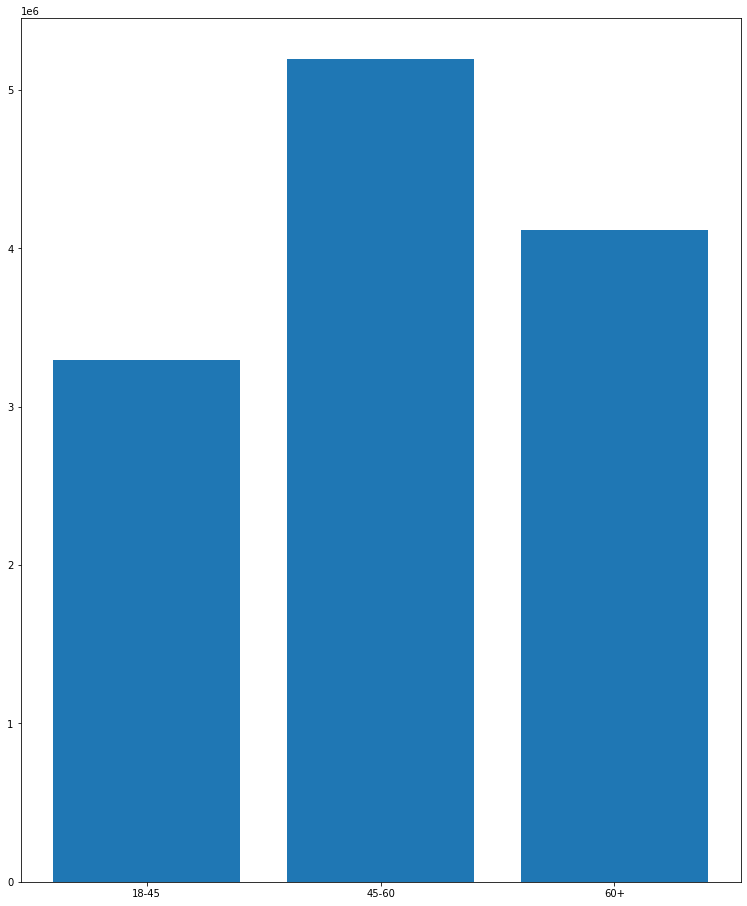

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
firstageka=df_karnataka["18-45 years (Age)"].iloc[142]
secondageka=df_karnataka["45-60 years (Age)"].iloc[142]
thirdageka=df_karnataka["60+ years (Age)"].iloc[142]
ages=['18-45','45-60','60+']
vaccine=[firstageka,secondageka,thirdageka]
ax.bar(ages,vaccine)
plt.show()

In [28]:
configure_plotly_browser_state()
firstagepika=df_karnataka["18-45 years (Age)"].iloc[142]
secondagepika=df_karnataka["45-60 years (Age)"].iloc[142]
thirdagepika=df_karnataka["60+ years (Age)"].iloc[142]
px.pie(names=["18-45","45-60","60+"],values=[firstagepika,secondagepika,thirdagepika],title="age wise distribution in karnataka")

In [29]:
configure_plotly_browser_state()
df_karnataka.iplot(kind='bar',x='Updated On',y='18-45 years (Age)')

In [30]:
configure_plotly_browser_state()
df_karnataka.iplot(kind='bar',x='Updated On',y='45-60 years (Age)')

In [31]:
configure_plotly_browser_state()
df_karnataka.iplot(kind='bar',x='Updated On',y='60+ years (Age)')

In [32]:
configure_plotly_browser_state()
Covaxinka = df_karnataka["Total Covaxin Administered"].iloc[142] 
Covishieldka = df_karnataka["Total CoviShield Administered"].iloc[142]  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxinka,Covishieldka],title="Covaxin and Covishield Vaccination in karnataka")

In [33]:
configure_plotly_browser_state()
Doseska = df_karnataka["Total Doses Administered"].iloc[142]
Vaccinatedka = df_karnataka["Total Individuals Vaccinated"].iloc[142]
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doseska,Vaccinatedka],title="Doses administered vs People Vaccinated in karnataka")

In [34]:
configure_plotly_browser_state()
df_karnataka.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')

In [35]:
df_kerala.tail(142)

Updated On   State  ...  60+ years (Age)  Total Doses Administered
2450  18/01/2021  Kerala  ...              NaN                    2566.0
2451  19/01/2021  Kerala  ...              NaN                    5355.0
2452  20/01/2021  Kerala  ...              NaN                    5398.0
2453  21/01/2021  Kerala  ...              NaN                    9175.0
2454  22/01/2021  Kerala  ...              NaN                   15501.0
...          ...     ...  ...              ...                       ...
2587  04/06/2021  Kerala  ...        3588358.0                10026627.0
2588  05/06/2021  Kerala  ...        3630418.0                10214963.0
2589  06/06/2021  Kerala  ...        3636049.0                10270131.0
2590  07/06/2021  Kerala  ...        3667093.0                10473049.0
2591  08/06/2021  Kerala  ...              NaN                       NaN

[142 rows x 18 columns]

In [36]:
display(df_kerala.iloc[142])

Updated On                              07/06/2021
State                                       Kerala
Total Individuals Vaccinated           8.30207e+06
Total Sessions Conducted                    387925
Total Sites                                   1269
First Dose Administered                8.30207e+06
Second Dose Administered               2.17098e+06
Male(Individuals Vaccinated)           3.96893e+06
Female(Individuals Vaccinated)         4.33181e+06
Transgender(Individuals Vaccinated)           1327
Total Covaxin Administered                  812130
Total CoviShield Administered           9.6609e+06
Total Sputnik V Administered                    22
AEFI                                          2396
18-45 years (Age)                      1.33176e+06
45-60 years (Age)                       3.2966e+06
60+ years (Age)                        3.66709e+06
Total Doses Administered                1.0473e+07
Name: 2590, dtype: object

In [37]:
configure_plotly_browser_state()
firstdoseke=df_kerala["First Dose Administered"].iloc[142]
seconddoseke=df_kerala["Second Dose Administered"].iloc[142]
px.pie(names=["First Dose","Second Dose"],values=[firstdoseke,seconddoseke],title="First VS Second Dose in kerala")

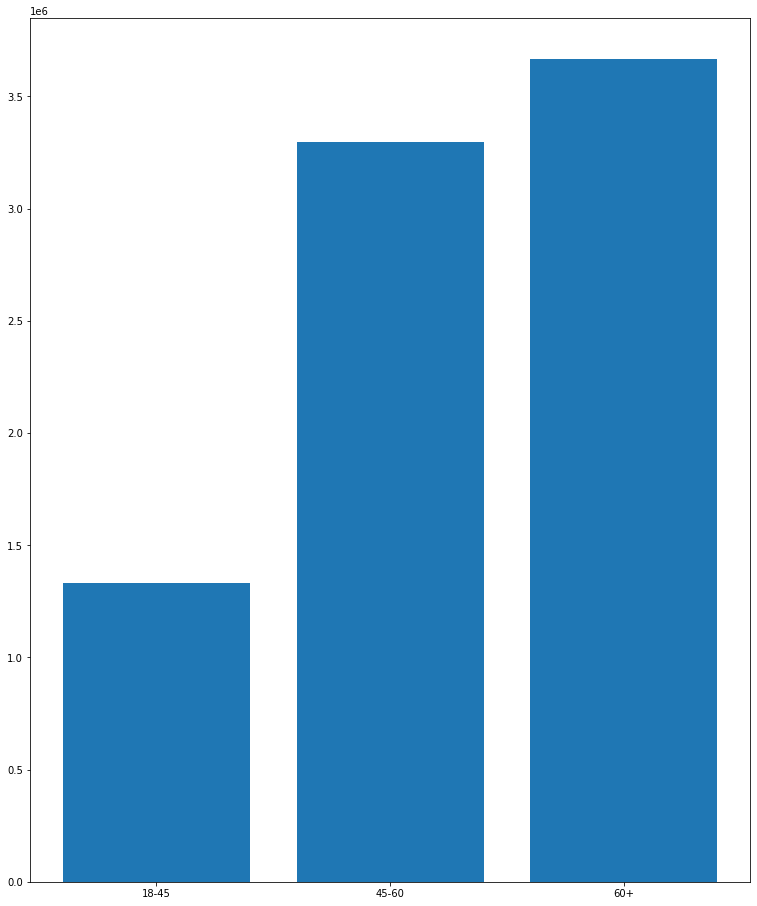

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
firstageke=df_kerala["18-45 years (Age)"].iloc[142]
secondageke=df_kerala["45-60 years (Age)"].iloc[142]
thirdageke=df_kerala["60+ years (Age)"].iloc[142]
ages=['18-45','45-60','60+']
vaccine=[firstageke,secondageke,thirdageke]
ax.bar(ages,vaccine)
plt.show()

In [39]:
configure_plotly_browser_state()
firstagepike=df_kerala["18-45 years (Age)"].iloc[142]
secondagepike=df_kerala["45-60 years (Age)"].iloc[142]
thirdagepike=df_kerala["60+ years (Age)"].iloc[142]
px.pie(names=["18-45","45-60","60+"],values=[firstagepike,secondagepike,thirdagepike],title="age wise distribution in kerala")

In [40]:
configure_plotly_browser_state()
df_kerala.iplot(kind='bar',x='Updated On',y='18-45 years (Age)')

In [41]:
configure_plotly_browser_state()
df_kerala.iplot(kind='bar',x='Updated On',y='45-60 years (Age)')

In [42]:
configure_plotly_browser_state()
df_kerala.iplot(kind='bar',x='Updated On',y='60+ years (Age)')

In [43]:
configure_plotly_browser_state()
maleke = df_kerala["Male(Individuals Vaccinated)"].iloc[142]
femaleke = df_kerala["Female(Individuals Vaccinated)"].iloc[142] 
transke = df_kerala["Transgender(Individuals Vaccinated)"].iloc[142]
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[maleke,femaleke,transke],title="Genders Vaccinated ratio in kerala")



In [44]:
configure_plotly_browser_state()
Covaxinke = df_kerala["Total Covaxin Administered"].iloc[142] 
Covishieldke = df_kerala["Total CoviShield Administered"].iloc[142]  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxinke,Covishieldke],title="Covaxin and Covishield Vaccination in kerala")

In [45]:
configure_plotly_browser_state()
Doseske = df_kerala["Total Doses Administered"].iloc[142] 
Vaccinatedke = df_kerala["Total Individuals Vaccinated"].iloc[142] 
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doseske,Vaccinatedke],title="Doses administered vs People Vaccinated in kerala")

In [46]:
configure_plotly_browser_state()
df_kerala.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')

In [47]:
display(df_tamilnadu.iloc[142])

Updated On                              07/06/2021
State                                   Tamil Nadu
Total Individuals Vaccinated           8.03168e+06
Total Sessions Conducted                    514480
Total Sites                                   1348
First Dose Administered                8.03168e+06
Second Dose Administered               2.10405e+06
Male(Individuals Vaccinated)           4.42887e+06
Female(Individuals Vaccinated)         3.60174e+06
Transgender(Individuals Vaccinated)           1076
Total Covaxin Administered             1.69558e+06
Total CoviShield Administered          8.44015e+06
Total Sputnik V Administered                     0
AEFI                                           133
18-45 years (Age)                      2.95045e+06
45-60 years (Age)                      3.00071e+06
60+ years (Age)                        2.07837e+06
Total Doses Administered               1.01357e+07
Name: 4606, dtype: object

In [48]:
configure_plotly_browser_state()
firstdosetn=df_tamilnadu["First Dose Administered"].iloc[142]
seconddosetn=df_tamilnadu["Second Dose Administered"].iloc[142]
px.pie(names=["First Dose","Second Dose"],values=[firstdosetn,seconddosetn],title="First VS Second Dose in tamil nadu")

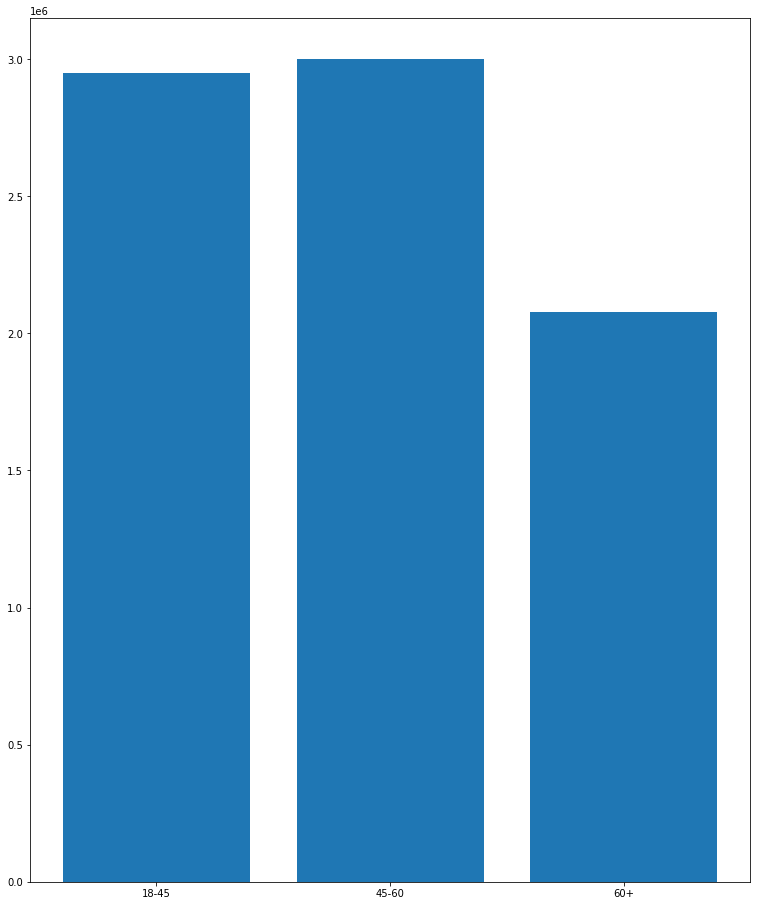

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
firstagetn=df_tamilnadu["18-45 years (Age)"].iloc[142]
secondagetn=df_tamilnadu["45-60 years (Age)"].iloc[142]
thirdagetn=df_tamilnadu["60+ years (Age)"].iloc[142]
ages=['18-45','45-60','60+']
vaccine=[firstagetn,secondagetn,thirdagetn]
ax.bar(ages,vaccine)
plt.show()

In [50]:
configure_plotly_browser_state()
firstagepitn=df_tamilnadu["18-45 years (Age)"].iloc[142]
secondagepitn=df_tamilnadu["45-60 years (Age)"].iloc[142]
thirdagepitn=df_tamilnadu["60+ years (Age)"].iloc[142]
px.pie(names=["18-45","45-60","60+"],values=[firstagepitn,secondagepitn,thirdagepitn],title="age wise distribution in tamil nadu")

In [51]:
configure_plotly_browser_state()
df_tamilnadu.iplot(kind='bar',x='Updated On',y='18-45 years (Age)')

In [52]:
configure_plotly_browser_state()
df_tamilnadu.iplot(kind='bar',x='Updated On',y='45-60 years (Age)')

In [53]:
configure_plotly_browser_state()
df_tamilnadu.iplot(kind='bar',x='Updated On',y='60+ years (Age)')

In [54]:
configure_plotly_browser_state()
maletn = df_tamilnadu["Male(Individuals Vaccinated)"].iloc[142]
femaletn = df_tamilnadu["Female(Individuals Vaccinated)"].iloc[142] 
transtn = df_tamilnadu["Transgender(Individuals Vaccinated)"].iloc[142]
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[maletn,femaletn,transtn],title="Genders Vaccinated ratio in tamil nadu")

In [55]:
configure_plotly_browser_state()
Covaxintn = df_tamilnadu["Total Covaxin Administered"].iloc[142] 
Covishieldtn = df_tamilnadu["Total CoviShield Administered"].iloc[142]  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxintn,Covishieldtn],title="Covaxin and Covishield Vaccination in tamil nadu")

In [56]:
configure_plotly_browser_state()
Dosestn = df_tamilnadu["Total Doses Administered"].iloc[142]
Vaccinatedtn = df_tamilnadu["Total Individuals Vaccinated"].iloc[142]
px.pie(names=["Doses Administered","People Vaccinated"],values=[Dosestn,Vaccinatedtn],title="Doses administered vs People Vaccinated in tamil nadu")

In [57]:
configure_plotly_browser_state()
df_tamilnadu.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')

In [59]:

df_vaccine1=pd.read_csv(r'/content/covid_vaccine_statewise (2).csv')
df_vaccine1 = df_vaccine1[df_vaccine1.State != 'India']

In [60]:
configure_plotly_browser_state()
top_10=df_vaccine1.groupby('State')['Second Dose Administered'].max().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State","Vaccinated"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State'].head(10),top_10['Second Dose Administered'].head(10)],
               fill = dict(color = ['lime', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State'].head(10),
                y=top_10['Second Dose Administered'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='lime'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest fully vaccinated cases',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)